<a href="https://colab.research.google.com/github/sergio0623/BI/blob/main/taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#Import the data and change it to DataFrame
product = pd.read_csv('/content/drive/MyDrive/product.csv', delimiter=';')
customer = pd.read_csv('//content/drive/MyDrive/custmer.csv', delimiter=';')
df_product = pd.DataFrame(product)
df_costumer = pd.DataFrame(customer)

In [2]:
df_product.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,"$ 246.172,68",Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,"$ 246.331,90",Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,"$ 209.280,91",Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,"$ 452.667,01",Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,"$ 467.083,31",Sold


In [3]:
df_costumer.head()

,Customer ID,Entity,Name,Surname,Age at time of purchase,Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,C0028,Individual,Madalyn,Mercer,19,18-25,1986,6,21,F,USA,California,Home,5,No,Website
1,C0027,Individual,Lara,Carrillo,22,18-25,1983,2,24,F,USA,California,Home,5,No,Website
2,C0112,Individual,Donavan,Flowers,22,18-25,1985,12,27,M,USA,California,Home,1,Yes,Client
3,C0160,Individual,Darien,Dorsey,22,18-25,1985,12,27,M,USA,California,Investment,3,Yes,Website
4,C0014,Individual,Alessandra,Perry,25,18-25,1979,5,15,F,USA,California,Home,4,No,Agency


In [4]:
df_costumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer ID              178 non-null    object
 1   Entity                   178 non-null    object
 2   Name                     178 non-null    object
 3   Surname                  178 non-null    object
 4   Age at time of purchase  178 non-null    int64 
 5   Interval                 178 non-null    object
 6   Y                        178 non-null    int64 
 7   M                        178 non-null    int64 
 8   D                        178 non-null    int64 
 9   Gender                   178 non-null    object
 10  Country                  178 non-null    object
 11  State                    164 non-null    object
 12  Purpose                  178 non-null    object
 13  Deal satisfaction        178 non-null    int64 
 14  Mortgage                 178 non-null    o

In [5]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                267 non-null    int64  
 1   Building          267 non-null    int64  
 2   Year of sale      195 non-null    float64
 3   Month of sale     195 non-null    float64
 4   Type of property  267 non-null    object 
 5   Property #        267 non-null    int64  
 6   Area (ft.)        267 non-null    float64
 7   Price             267 non-null    object 
 8   Status            195 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 18.9+ KB


In [6]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                267 non-null    int64  
 1   Building          267 non-null    int64  
 2   Year of sale      195 non-null    float64
 3   Month of sale     195 non-null    float64
 4   Type of property  267 non-null    object 
 5   Property #        267 non-null    int64  
 6   Area (ft.)        267 non-null    float64
 7   Price             267 non-null    object 
 8   Status            195 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 18.9+ KB


In [7]:
#Task 1: What are the types of data and the levels of measurement of the following variables: Cust ID, Mortgage, Year of sale
print("custumer id = ", df_costumer['Customer ID'].dtype, ",categorico, nominal")
print("Mortgage = ", df_costumer['Mortgage'].dtype, "categorico, nominal")
print("Year of sale = ",df_product['Year of sale'].dtype, "categorico, fecha, ratio")

custumer id =  object ,categorico, nominal
Mortgage =  object categorico, nominal
Year of sale =  float64 categorico, fecha, ratio


In [8]:
def replace(string, looking_for, replace_for):
    new = ""
    for letter in string:
        if letter == looking_for:
            new += replace_for
        else:
            new += letter
    return new

x = 0 
for space in df_product['Price']:
    df_product.loc[x,'Price'] = df_product.loc[x,'Price'].replace(space,space.strip())
    x += 1
y = 0 
for dolar in df_product['Price']:
    df_product.loc[y,'Price'] = df_product.loc[y,'Price'].replace(dolar,dolar[1:])
    y += 1
z = 0 
for dot in df_product['Price']:    
    df_product.loc[z,'Price'] = replace(dot,".","")
    z += 1
w = 0
for coma in df_product['Price']:
    df_product.loc[w,'Price'] = replace(coma,",",".")
    w += 1

df_product['Price'] = df_product['Price'].astype(float)

#Generate the No sold category on the column Status
df_product['Status'] =df_product['Status'].fillna('No sold')

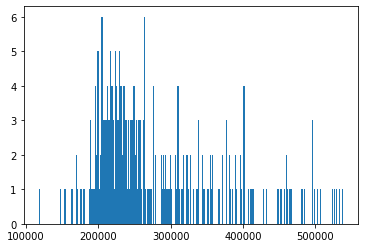

In [9]:
#Task 2: Create a frequency distribution graph representing the price (that is a histogram with the highest possible number of bins - 272). 
#Use data on all apartments and offices, no matter if sold or not.

import matplotlib.pyplot as plt

plt.hist(df_product['Price'], bins=272)
plt.show()

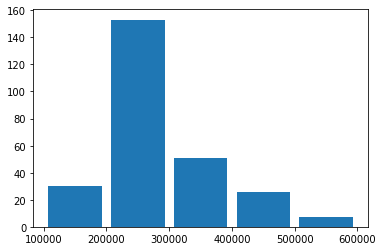

In [10]:
#task 3: Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000. 
#If you don't know how to do that, refer to the Course notes on descriptive statistics provided with the first lecture in this section.
a = [100000,200000,300000,400000,500000,600000]
plt.hist(x=df_product['Price'], bins=a, rwidth=0.85)
plt.xticks(a)
plt.show()

#Task 4: Interpret the results.

segun los datos que podemos observar en ambos graficos vemos que el rango que tiene mayor cantidad de ventas esta entre 200.000 y 300.000, el segundo rango con mas ventas esta entre 300.000 y 400.000

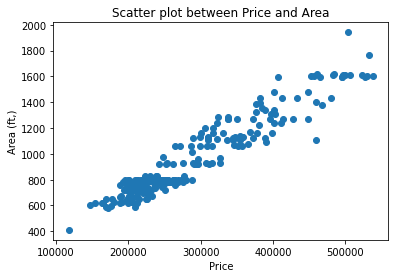

In [11]:
#Task 5: Create a scatter plot showing the relationship between Price and Area. Use the data on all properties, no matter if sold or not. Interpret the results.
fig, ax=plt.subplots()
ax.scatter(df_product['Price'],df_product['Area (ft.)'])
plt.xlabel('Price')
plt.ylabel('Area (ft,)')
plt.title('Scatter plot between Price and Area')

plt.show()

en el grafico anterior podemos visualizar una relacion positiva ya que ambos aumentan al mismo nivel, ademas de tener una recta imaginaria trazada podemos ver la cercania a la misma, es decir no tenemos mucha dispersion entre los datos de precio y area.

In [14]:
#Task 6: Create a frequency distribution table, where you list all the countries from which the company has buyers (country vs number of buyers). 
#Count the absolute frequency, the relative frequency and the cumulative frequency. 

frecuencia = pd.DataFrame(pd.value_counts(df_costumer['Country']))
frecuencia.columns = ["Absolute frequency"]

frecuencia['Relative frequency'] = frecuencia['Absolute frequency']/len(df_costumer['Country'])

acum = []
values_acum = 0
for i in frecuencia['Relative frequency']:
    values_acum += i
    acum.append(values_acum)
frecuencia['Cumulative frequency'] = acum

frecuencia

,Absolute frequency,Relative frequency,Cumulative frequency
USA,160,0.898876,0.898876
Canada,7,0.039326,0.938202
Russia,4,0.022472,0.960674
UK,2,0.011236,0.971910
Belgium,2,0.011236,0.983146
Denmark,1,0.005618,0.988764
Germany,1,0.005618,0.994382
Mexico,1,0.005618,1.000000


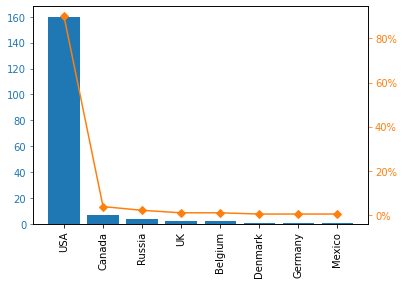

In [15]:
#Task 7: Create a Pareto diagram representing the data.
from matplotlib.ticker import PercentFormatter
Pareto = plt.figure()
ax = Pareto.add_subplot(1,1,1)
ax.bar(frecuencia.index, frecuencia['Absolute frequency'], color = 'C0')
ax2 = ax.twinx()
ax2.plot(frecuencia.index, frecuencia['Relative frequency']*100, color="C1", marker='D', ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors = 'C0')
ax2.tick_params(axis='y', colors ='C1')
ax.set_xticklabels(frecuencia.index, rotation= 90)

plt.show()

In [16]:
#Task 8: Calculate the mean, median, mode, skewness, variance and standard deviation of Price for all properties, no matter if sold or not.
import statistics as st
print('la media es : ',round(st.mean(df_product['Price']),2))
print('la mediana es : ',round(st.median(df_product['Price']),2))
print('la moda es : ',round(st.mode(df_product['Price']),2))
ske = df_product['Price']
print('la curvatura es : ',round(ske.skew(),2))
print('la varianza es : ',round(st.variance(df_product['Price']),2))
print('la desviacion estandar es : ',round(st.stdev(df_product['Price']),2))

la media es :  281171.9
la mediana es :  249075.66
la moda es :  460001.26
la curvatura es :  1.1
la varianza es :  7942217728.65
la desviacion estandar es :  89119.12


Task 9: Interpret the measures.

con estas estadisticas que calculamos anteriormente podemos concluir:
la media se ve afectada por los datos que son muy grandes o muy pequeños segun el tamaño de los mismo presentes en el precio, es un dato que no permite tener en claro totalmente cual es el valor exacto.
la mediana solo nos muestra el valor de la mitad sin verse afectado por valores grandes o pequeños que en este caso vemos que es el valor de 249075.66
la moda es el dato que mas se repite dandonos asi el valor mas existente en la base de datos.


In [41]:
#Task 10: Calculate the covariance and correlation coefficient between Price and Area, no matter if the property is sold or not. Is the result in line with the scatter plot?

import numpy as np
covarianza=np.cov(df_product['Price'],df_product['Area (ft.)'])
print("la covarianza es: ",covarianza)

correlacion=np.corrcoef(df_product['Price'],df_product['Area (ft.)'])
print("la correlacion es: ",correlacion)

la covarianza es:  [[7.94221773e+09 2.41477073e+07]
 [2.41477073e+07 8.11650800e+04]]
la correlacion es:  [[1.         0.95108733]
 [0.95108733 1.        ]]
